# Центральная предельная теорема своими руками

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

### Гамма распределение
Информация про [гамма распределение](https://en.wikipedia.org/wiki/Gamma_distribution) взята из Википедии.
<br>
Рассмотрим пример при k = 3, $\theta$ = 2.
<br>
Знаем, что E[X] = k$\theta$, D[X] = k$\theta^2$.

In [2]:
k = 3.0
theta = 2.0
gamma_mean = k * theta
gamma_variance = k * theta ** 2

gamma_rv = sts.gamma(a=k,scale=theta)

### Гистограмма по выборке и теоритическая плотность распределения
Сгенерируем выборку из гамма распределения объёма 1000.
<br>
Построим гистрограмму по данной выборке и плотность распределения на отрезке [0,30].
<br>
У plt.hist выставляем параметр density=True, чтобы величины были в одном масштабе.

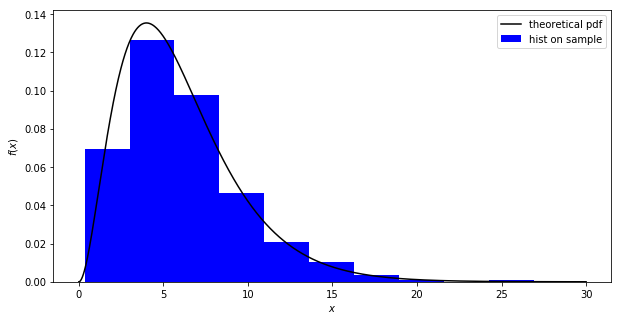

In [407]:
sample = gamma_rv.rvs(size=1000)
x = np.linspace(0,30,1000)
pdf = gamma_rv.pdf(x)

plt.figure(figsize=(10,5))
plt.plot(x, pdf, 'black', label='theoretical pdf')
plt.hist(sample, density=True, color='blue', label='hist on sample')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

### Оценка распределения выборочного среднего сл.в. X~Gamma(k, $\theta$) при разных объёмах выборок.
Для примера рассмотрим выборки объема n={5, 10, 50, 200, 1000} (=n_list)
<br>
xlimits - массив, вручную подобранных границ по оси Ox для графиков при соответствующих объемах выборки $n_{i}$ для визуального удобства.
<br>
Сгенирируем 1000 выборок объема $n_{i}$, для каждой найдем выборочное среднее и поместим в матрицу matrix.
<br>
matrix устроена следующим образом: в i-й строке записано 1000 выборочных средних от выборки объема $n_{i}$

In [408]:
n_list = [5, 10, 50, 200, 1000]
xlimits = [(0, 14), (1, 12), (2, 10), (4, 8), (4, 8)]
matrix = np.array([[np.mean(gamma_rv.rvs(size = n_i)) for _ in range(1000)] for n_i in n_list])
matrix.shape

(5, 1000)

### Создадим функцию, генерирующую нормальное распределение
Согласно ЦПТ $X_{n}$ $\approx$~$N$($EX$, $\frac{DX}{n}$).
Значит, параметры для генерации нормального распределения случайной величины, имеющей Гамма распределения таковы: 
$N$(k$\theta$, $\frac{k\theta^2}{n}$)
Сгенерируем нормальное распределение на отрезке [0,15] по 1000 точкам для большей точности, так как x > 0 для Гамма распределения.

In [409]:
def NormRvN_i(size):
    norm_rv = sts.norm(gamma_mean, np.sqrt(gamma_variance / size))
    x = np.linspace(0, 15, 1000)
    pdf = norm_rv.pdf(x)
    return x, pdf

### Построение гистограмм распределений выборочных средних для заданных объемов выборки и соответствующих плотностей нормального распределения

In [410]:
def DrawHistAndDensity(n_i):
    x, pdf = NormRvN_i(n_i)
    sample = matrix[n_list.index(n_i)]
    a, b = xlimits[n_list.index(n_i)]
    
    plt.figure(figsize=(10,5))
    plt.plot(x, pdf, 'black', label='Normal PDF,$\mu={0}, \sigma^2={1}$'.format(gamma_mean,gamma_variance/n_i))
    plt.hist(sample,bins='auto', density=True, color='blue', label='Hist, $n={0}$'.format(n_i))
    plt.legend()
    plt.title('Распределение выборочных средних для $n={0}$'.format(n_i))
    plt.ylabel('$f(x)$', fontsize=14)
    plt.xlabel('$x$', fontsize=14)
    plt.xlim(a,b)
    plt.show()

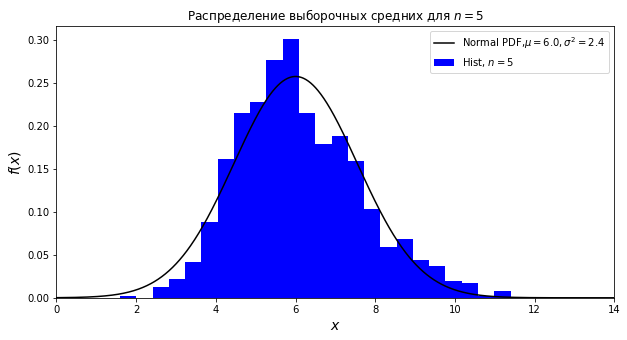

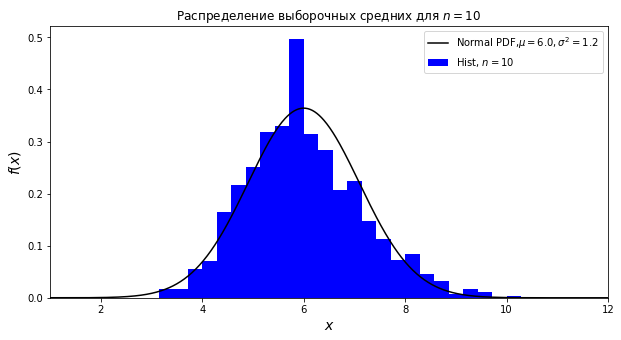

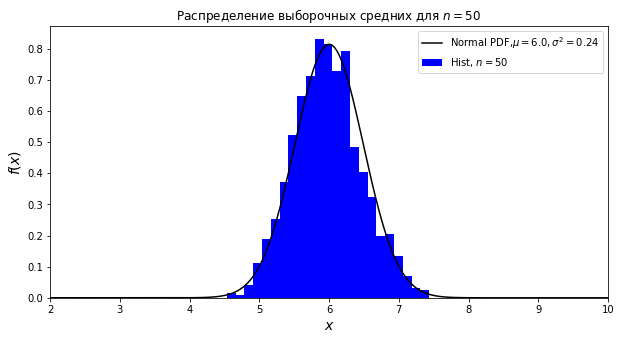

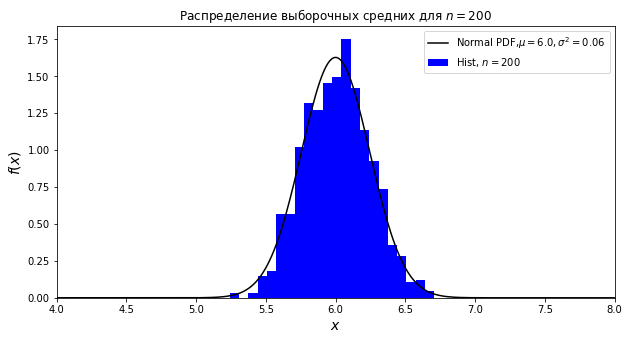

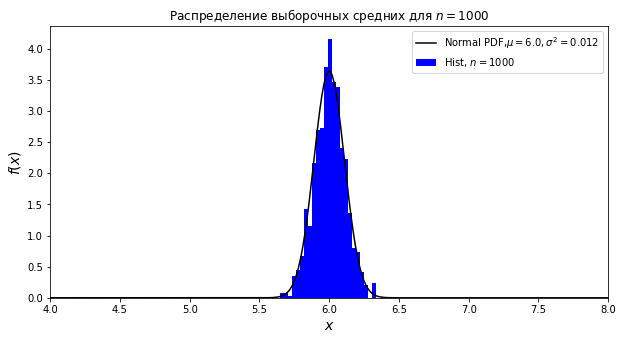

In [411]:
for n_i in n_list:
    DrawHistAndDensity(n_i)

### Вывод

Выбранное гамма распределение денонстрирует в действии Центральную предельную теорему (ЦПТ).
<br>
При различных n было сгенерировано по 1000 выборок, посчитаны их выборочные средние и отражены в виде гистаграммы совместно с плотностью нормального распределения, параметры которого выбирались исходя из ЦПТ и исходных параметров гамма распределения.
<br>
Как видно из графиков, точность аппроксимации распределения выборочных средних нормальным с ростом n увеличивается, что и неудивительно, так как ЦПТ именно об этом и говорит.
<br>
Так, при $n = 5$, например, гистограмма имеет самую широкую форму среди остальных, наблюдаются шумы, но её вид уже начинает напоминать о нормальном распределении. С дальнейшем ростом n гистограмма сужается ввиду уменьшения дисперсии, все больше величин "стараются оказаться" у её центра (мат. ожидания), а гистограмма все целостнее попадает под график плотности нормального распределения.